In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the file and read the data
data = pd.read_csv("globalterrorism.csv", encoding="latin1")
data.head()

C:\Users\SAISEN\AppData\Local\Temp\ipykernel_10364\4163331463.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("globalterrorism.csv", encoding="latin1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
# check for the column names
columns = list(data.columns)

In [4]:
#Renaming the columns for ease of using them later
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'
                    },inplace=True)

In [5]:
#getting only the columns to be used
data = data[['Year','Month','Day','Country','Region','state','city','latitude','longitude','AttackType','Killed','Wounded','Target',
            'Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [6]:
# check rows and columns
data.shape

(181691, 19)

In [7]:
# check for the null values
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
state             421
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [8]:
# dropping all null values and saving it to another variable
data2 = data.dropna(axis=0)

In [9]:
# again checking shape for confirmation
data2.shape

(46556, 19)

In [10]:
# again checking null values for confirmation
data2.isnull().sum()

Year           0
Month          0
Day            0
Country        0
Region         0
state          0
city           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
dtype: int64

In [11]:
# the summary of the data
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46556 entries, 5 to 181683
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         46556 non-null  int64  
 1   Month        46556 non-null  int64  
 2   Day          46556 non-null  int64  
 3   Country      46556 non-null  object 
 4   Region       46556 non-null  object 
 5   state        46556 non-null  object 
 6   city         46556 non-null  object 
 7   latitude     46556 non-null  float64
 8   longitude    46556 non-null  float64
 9   AttackType   46556 non-null  object 
 10  Killed       46556 non-null  float64
 11  Wounded      46556 non-null  float64
 12  Target       46556 non-null  object 
 13  Target       46556 non-null  object 
 14  Summary      46556 non-null  object 
 15  Group        46556 non-null  object 
 16  Target_type  46556 non-null  object 
 17  Weapon_type  46556 non-null  object 
 18  Motive       46556 non-null  object 
dtypes: 

In [12]:
# some information which shows us the following perspective

print("Most Attacked")
print("Country : ",data2['Country'].value_counts().idxmax())
print('Region :',data2['Region'].value_counts().idxmax())
print('Year : ',data2['Year'].value_counts().idxmax())
print('Month : ',data2['Month'].value_counts().idxmax())
print('Type: ',data2['AttackType'].value_counts().idxmax())

Most Attacked
Country :  Iraq
Region : South Asia
Year :  2011
Month :  7
Type:  Bombing/Explosion


In [13]:
# checking for the column names
data2.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'state', 'city',
       'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

In [14]:
# as we can see there are two Target named columns lets remove one
data2 = data2.loc[:, ~data2.columns.duplicated()]

In [15]:
# Choropleth Map:
#pip install -U kaleido

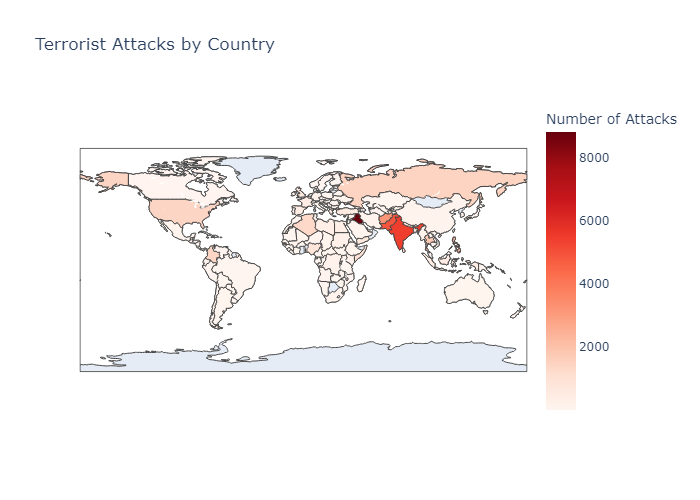

In [16]:
import plotly.express as px

# Group the data by country and count the number of attacks
country_counts = data2['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Attack Count']

# Create the choropleth map
fig = px.choropleth(country_counts, 
                    locations='Country',
                    locationmode='country names',
                    color='Attack Count',
                    title='Terrorist Attacks by Country',
                    labels={'Attack Count': 'Number of Attacks'},
                    hover_name='Country',
                    color_continuous_scale='Reds')

fig.show("png")


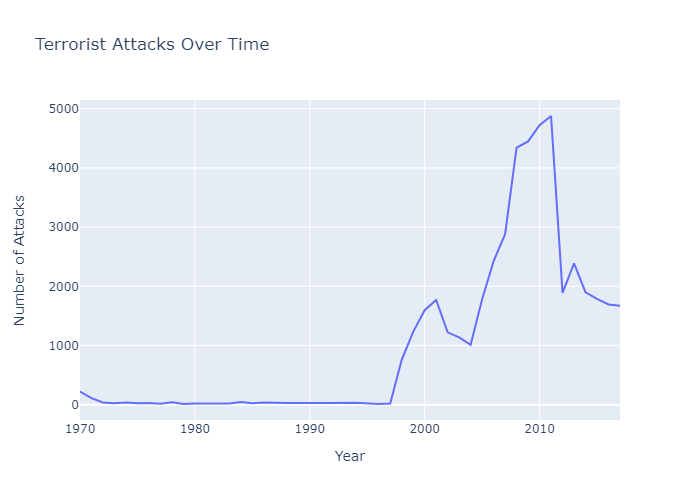

In [17]:
# Time Series Plot:
import plotly.graph_objects as go

# Group the data by year and count the number of attacks
yearly_counts = data2['Year'].value_counts().sort_index()

# Create the time series plot
fig = go.Figure(data=go.Scatter(x=yearly_counts.index,
                               y=yearly_counts.values,
                               mode='lines',
                               name='Number of Attacks'))

fig.update_layout(title='Terrorist Attacks Over Time',
                  xaxis_title='Year',
                  yaxis_title='Number of Attacks',
                  hovermode='x unified')

fig.show("png")


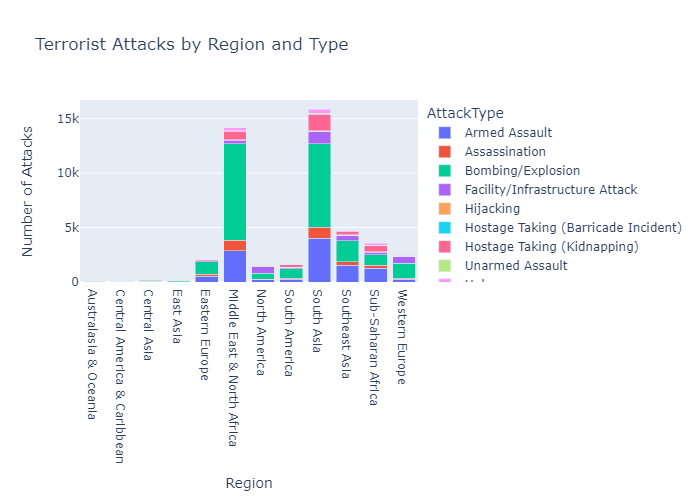

In [18]:
# Stacked Bar Chart:
# Group the data by region and attack type and count the number of attacks
region_attack_counts = data2.groupby(['Region', 'AttackType']).size().reset_index()
region_attack_counts.columns = ['Region', 'AttackType', 'Attack Count']

# Create the stacked bar chart
fig = px.bar(region_attack_counts, 
             x='Region',
             y='Attack Count',
             color='AttackType',
             title='Terrorist Attacks by Region and Type',
             labels={'Attack Count': 'Number of Attacks'},
             hover_name='AttackType',
             barmode='stack')

fig.show("png")

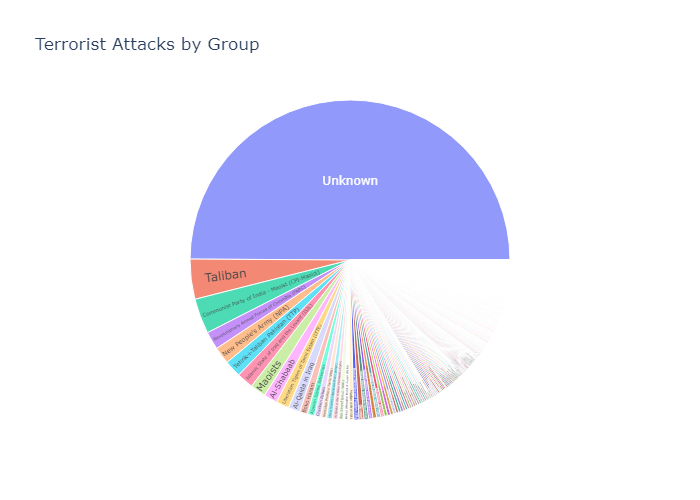

In [19]:
# Sunburst Chart:
# Group the data by terrorist group and count the number of attacks
group_counts = data2['Group'].value_counts().reset_index()
group_counts.columns = ['Group', 'Attack Count']

# Create the sunburst chart
fig = go.Figure(go.Sunburst(
    labels=group_counts['Group'],
    parents=["" for _ in group_counts['Group']],
    values=group_counts['Attack Count']
))

fig.update_layout(
    title='Terrorist Attacks by Group',
    hovermode='closest'
)

fig.show("png")

In [20]:
# Word Cloud:
# make sure to install the wordcloud library using the below command for windows
#pip install wordcloud

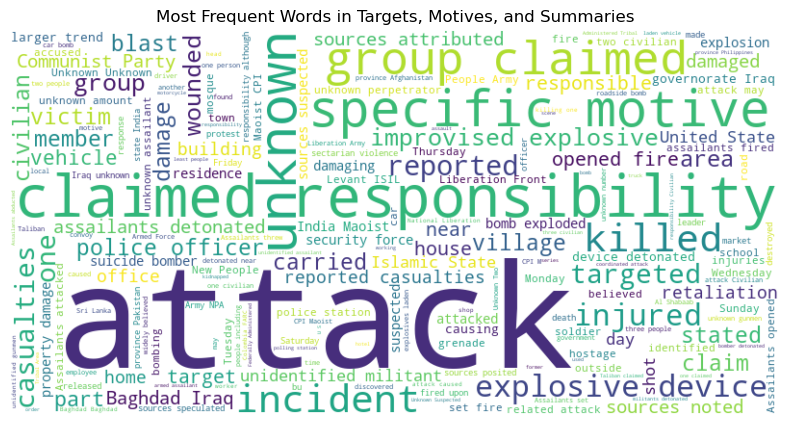

In [21]:
from wordcloud import WordCloud

# Concatenate the target, motive, and summary columns
text = data2['Target'].astype(str) + ' ' + data2['Motive'].astype(str) + ' ' + data2['Summary'].astype(str)
text = ' '.join(text)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_font_size=150, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Targets, Motives, and Summaries')
plt.show()

In [22]:
### dataset li is below:
#https://www.kaggle.com/datasets/START-UMD/gtd